# Multiple Regression
##### I don't look at a problem and put variables in there that don't affect it. -Bill Parcells

In [43]:
%%capture
# To supress the output when calling Statistics file
%run ./SimpleLinearRegression.ipynb
from functools import partial

For multiple regression the vector of parameters will be called beta. <br/>
beta = [beta_0, beta_1, beta_2, ...., beta_k] <br/>
and: <br/>
x_i  = [1, x_i1, x_i2, ...., x_ik]

In [44]:
def predict(x_i, beta):
    """assumes that first element of each x_i is 1"""
    return dot(x_i, beta)

def error(x_i, y_i, beta):
    return y_i - predict(x_i, beta)

def squared_error(x_i, y_i, beta):
    return error(x_i, y_i, beta)**2

def squared_error_gradient(x_i, y_i, beta):
    return [-2*x_ij * error(x_i, y_i, beta)
           for x_ij in x_i]

def estimate_beta(x, y):
    beta_initial = [random.random() for x_i in x[0]]
    return minimize_stochastic(squared_error,
                              squared_error_gradient,
                              x, y,
                              beta_initial,
                              0.001)

In [55]:
random.seed(0)
x = [[1,49,4,0],[1,41,9,0],[1,40,8,0],[1,25,6,0],[1,21,1,0],[1,21,0,0],[1,19,3,0],[1,19,0,0],[1,18,9,0],[1,18,8,0],[1,16,4,0],[1,15,3,0],[1,15,0,0],[1,15,2,0],[1,15,7,0],[1,14,0,0],[1,14,1,0],[1,13,1,0],[1,13,7,0],[1,13,4,0],[1,13,2,0],[1,12,5,0],[1,12,0,0],[1,11,9,0],[1,10,9,0],[1,10,1,0],[1,10,1,0],[1,10,7,0],[1,10,9,0],[1,10,1,0],[1,10,6,0],[1,10,6,0],[1,10,8,0],[1,10,10,0],[1,10,6,0],[1,10,0,0],[1,10,5,0],[1,10,3,0],[1,10,4,0],[1,9,9,0],[1,9,9,0],[1,9,0,0],[1,9,0,0],[1,9,6,0],[1,9,10,0],[1,9,8,0],[1,9,5,0],[1,9,2,0],[1,9,9,0],[1,9,10,0],[1,9,7,0],[1,9,2,0],[1,9,0,0],[1,9,4,0],[1,9,6,0],[1,9,4,0],[1,9,7,0],[1,8,3,0],[1,8,2,0],[1,8,4,0],[1,8,9,0],[1,8,2,0],[1,8,3,0],[1,8,5,0],[1,8,8,0],[1,8,0,0],[1,8,9,0],[1,8,10,0],[1,8,5,0],[1,8,5,0],[1,7,5,0],[1,7,5,0],[1,7,0,0],[1,7,2,0],[1,7,8,0],[1,7,10,0],[1,7,5,0],[1,7,3,0],[1,7,3,0],[1,7,6,0],[1,7,7,0],[1,7,7,0],[1,7,9,0],[1,7,3,0],[1,7,8,0],[1,6,4,0],[1,6,6,0],[1,6,4,0],[1,6,9,0],[1,6,0,0],[1,6,1,0],[1,6,4,0],[1,6,1,0],[1,6,0,0],[1,6,7,0],[1,6,0,0],[1,6,8,0],[1,6,4,0],[1,6,2,1],[1,6,1,1],[1,6,3,1],[1,6,6,1],[1,6,4,1],[1,6,4,1],[1,6,1,1],[1,6,3,1],[1,6,4,1],[1,5,1,1],[1,5,9,1],[1,5,4,1],[1,5,6,1],[1,5,4,1],[1,5,4,1],[1,5,10,1],[1,5,5,1],[1,5,2,1],[1,5,4,1],[1,5,4,1],[1,5,9,1],[1,5,3,1],[1,5,10,1],[1,5,2,1],[1,5,2,1],[1,5,9,1],[1,4,8,1],[1,4,6,1],[1,4,0,1],[1,4,10,1],[1,4,5,1],[1,4,10,1],[1,4,9,1],[1,4,1,1],[1,4,4,1],[1,4,4,1],[1,4,0,1],[1,4,3,1],[1,4,1,1],[1,4,3,1],[1,4,2,1],[1,4,4,1],[1,4,4,1],[1,4,8,1],[1,4,2,1],[1,4,4,1],[1,3,2,1],[1,3,6,1],[1,3,4,1],[1,3,7,1],[1,3,4,1],[1,3,1,1],[1,3,10,1],[1,3,3,1],[1,3,4,1],[1,3,7,1],[1,3,5,1],[1,3,6,1],[1,3,1,1],[1,3,6,1],[1,3,10,1],[1,3,2,1],[1,3,4,1],[1,3,2,1],[1,3,1,1],[1,3,5,1],[1,2,4,1],[1,2,2,1],[1,2,8,1],[1,2,3,1],[1,2,1,1],[1,2,9,1],[1,2,10,1],[1,2,9,1],[1,2,4,1],[1,2,5,1],[1,2,0,1],[1,2,9,1],[1,2,9,1],[1,2,0,1],[1,2,1,1],[1,2,1,1],[1,2,4,1],[1,1,0,1],[1,1,2,1],[1,1,2,1],[1,1,5,1],[1,1,3,1],[1,1,10,1],[1,1,6,1],[1,1,0,1],[1,1,8,1],[1,1,6,1],[1,1,4,1],[1,1,9,1],[1,1,9,1],[1,1,4,1],[1,1,2,1],[1,1,9,1],[1,1,0,1],[1,1,8,1],[1,1,6,1],[1,1,1,1],[1,1,1,1],[1,1,5,1]]
daily_minutes_good = [68.77,51.25,52.08,38.36,44.54,57.13,51.4,41.42,31.22,34.76,54.01,38.79,47.59,49.1,27.66,41.03,36.73,48.65,28.12,46.62,35.57,32.98,35,26.07,23.77,39.73,40.57,31.65,31.21,36.32,20.45,21.93,26.02,27.34,23.49,46.94,30.5,33.8,24.23,21.4,27.94,32.24,40.57,25.07,19.42,22.39,18.42,46.96,23.72,26.41,26.97,36.76,40.32,35.02,29.47,30.2,31,38.11,38.18,36.31,21.03,30.86,36.07,28.66,29.08,37.28,15.28,24.17,22.31,30.17,25.53,19.85,35.37,44.6,17.23,13.47,26.33,35.02,32.09,24.81,19.33,28.77,24.26,31.98,25.73,24.86,16.28,34.51,15.23,39.72,40.8,26.06,35.76,34.76,16.13,44.04,18.03,19.65,32.62,35.59,39.43,14.18,35.24,40.13,41.82,35.45,36.07,43.67,24.61,20.9,21.9,18.79,27.61,27.21,26.61,29.77,20.59,27.53,13.82,33.2,25,33.1,36.65,18.63,14.87,22.2,36.81,25.53,24.62,26.25,18.21,28.08,19.42,29.79,32.8,35.99,28.32,27.79,35.88,29.06,36.28,14.1,36.63,37.49,26.9,18.58,38.48,24.48,18.95,33.55,14.24,29.04,32.51,25.63,22.22,19,32.73,15.16,13.9,27.2,32.01,29.27,33,13.74,20.42,27.32,18.23,35.35,28.48,9.08,24.62,20.12,35.26,19.92,31.02,16.49,12.16,30.7,31.22,34.65,13.13,27.51,33.2,31.57,14.1,33.42,17.44,10.12,24.42,9.82,23.39,30.93,15.03,21.67,31.09,33.29,22.61,26.89,23.48,8.38,27.81,32.35,23.84]    

beta_est   = estimate_beta(x, daily_minutes_good)
beta_0 = round(beta_est[0],2)
beta_1 = round(beta_est[1],3)
beta_2 = round(beta_est[2],3)
beta_3 = round(beta_est[3],3)

print("minutes = ", beta_0, " + ", beta_1, " friends + ", beta_2, " work_hours + ", beta_3, " phd")

minutes =  28.45  +  1.098  friends +  -1.86  work_hours +  2.67  phd


In [46]:
def multiple_r_squared(x,y,beta):
    sum_of_squared_errors = sum(error(x_i, y_i, beta)**2 
                                for x_i, y_i in zip (x,y))
    return 1.0 - sum_of_squared_errors/total_sum_of_squares(y)

multiple_r_squared(x, daily_minutes_good, beta)

0.6732395705713567

### Bootstrap

Medians of data:  100.08980118353116 100.34507757567151


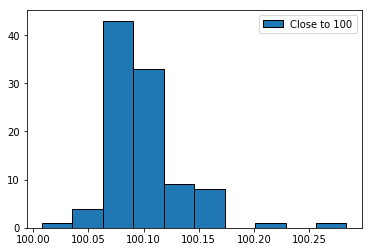

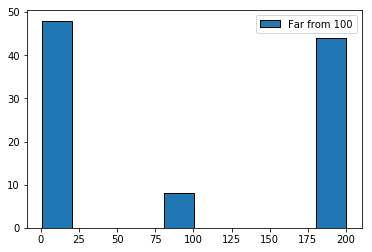

In [47]:
def bootstrap_sample(data):
    """randomly samples len(data) elements with replacement"""
    return [random.choice(data) for _ in data]

def bootstrap_statistic(data, stats_fn, num_samples):
    """evalueates stats_fn on num_samples bootstrap samples from data"""
    return [stats_fn(bootstrap_sample(data)) for _ in range(num_samples)]

random.seed(0)
# 101 points all very close to 100
close_to_100 = [99.5 + random.random() for _ in range(101)]

# 101 points, 50 of them close to 0, 50 of them close to 200
far_from_100 = ([99.5 + random.random()] + 
                [random.random() for _ in range(50)] + 
                [200+random.random() for _ in range(50)])

print("Medians of data: ", median(close_to_100), median(far_from_100))

plt.figure()
plt.hist(bootstrap_statistic(close_to_100, median, 100), ec="black", label="Close to 100")
plt.legend()

plt.figure()
plt.hist(bootstrap_statistic(far_from_100, median, 100), ec="black", label="Far from 100")
plt.legend()

### Standard errors of Regression

In [48]:
def estimate_sample_beta(sample):
    """sample is a list of pairs (x_i, y_i)"""
    x_sample, y_sample = zip(*sample)
    return estimate_beta(x_sample, y_sample)

random.seed(0)
data  = list(zip(x, daily_minutes_good))
bootstrap_betas = bootstrap_statistic(data, 
                                      estimate_sample_beta, 
                                      100)

[2.499538612434372, 0.20024501849420248, 0.1490728790053932, 1.746417845705559]


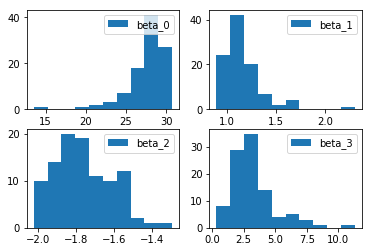

In [58]:
bootstrap_beta_0 = get_column(bootstrap_betas,0)
bootstrap_beta_1 = get_column(bootstrap_betas,1)
bootstrap_beta_2 = get_column(bootstrap_betas,2)
bootstrap_beta_3 = get_column(bootstrap_betas,3)

fig, ax = plt.subplots(2,2)
ax[0][0].hist(bootstrap_beta_0, label="beta_0"); ax[0][0].legend(loc="upper right")
ax[0][1].hist(bootstrap_beta_1, label="beta_1"); ax[0][1].legend(loc="upper right")
ax[1][0].hist(bootstrap_beta_2, label="beta_2"); ax[1][0].legend(loc="upper right")
ax[1][1].hist(bootstrap_beta_3, label="beta_3"); ax[1][1].legend(loc="upper right")

bootstrap_standard_errors = [standard_deviation(beta_i) 
                             for beta_i in [bootstrap_beta_0, bootstrap_beta_1, bootstrap_beta_2, bootstrap_beta_3]]
print(bootstrap_standard_errors)

We can use the standard deviations to test hypothesis such as "does beta_i equal zero?" Under the null hypothesis *beta_i* = 0 (and with our other assumprion about the distribution of *error_i*) the statistic: <br/>
**tj = beta_hat_j / sigma_hat_j**

which is our estimate of *beta_j* divided by our estimate of its standard error, follows a t-distribution.
For large degree of freedom (n) we can use *normal_cdf* to approximate *t_cdf* <br/>
Essentially we are testing if the (standardised) coefficients come from a distribution with mean 0 and std 1.

In [49]:
def p_value(beta_hat_j, sigma_hat_j):
    if beta_hat_j > 0:
        # if coefficients are positive, we need to compute
        # twice the probability of seeing an even larger value
        return 2*(1 - normal_cdf(beta_hat_j/sigma_hat_j))
    else:
        # otherwise twice the probability of seeing a smaller value
        return 2*normal_cdf(beta_hat_j/sigma_hat_j)
    
print(p_value(beta_0, bootstrap_standard_errors[0]))
print(p_value(beta_1, bootstrap_standard_errors[1]))
print(p_value(beta_2, bootstrap_standard_errors[2]))
print(p_value(beta_3, bootstrap_standard_errors[3]))

0.0
4.175055678956596e-08
0.0
0.1263031847961611


While most coefficients have very small p-values (suggesting that they are indeed non-zero), the coefficient for PhD is not significantly different from zero, which means that the coefficient for PhD is random rather than meaningful.

### Regularisation
We don't penalise the beta_0 term

In [52]:
# alpha is the *hyperparameter* controlling how harsh the penalty is
# sometimes it's called "lambda" but that already means something in Python

def ridge_penalty(beta, alpha):
    return alpha*dot(beta[1:],beta[1:])

def squared_error_ridge(x_i, y_i, beta, alpha):
    """estimate error plus ridge penalty on beta"""
    return error(x_i, y_i, beta)**2 + ridge_penalty(beta, alpha)

def ridge_penalty_gradient(beta, alpha):
    """gradient of just the ridge penalty"""
    return [0.0] + [2*alpha*beta_j for beta_j in beta[1:]]

def squared_error_ridge_gradient(x_i, y_i, beta, alpha):
    """the gradient corresponding to the ith squared error term including the ridge penalty"""
    return vector_add(squared_error_gradient(x_i, y_i, beta),
                     ridge_penalty_gradient(beta, alpha))

# We can now use this in gradient descent 
def estimate_beta_ridge(x, y, alpha):
    """use gradient descent to fit a ridge regression with penalty alpha"""
    beta_initial = [random.random() for x_i in x[0]]
    return minimize_stochastic(partial(squared_error_ridge, alpha=alpha), # partial lets fill in later arguments
                              partial(squared_error_ridge_gradient, alpha=alpha),
                              x, y,
                              beta_initial,
                              0.001)


In [69]:
random.seed(0)
# with alpha set to zero, there's no penalty at all and we get the same results as before
beta_0    = estimate_beta_ridge(x, daily_minutes_good, alpha=0.0)
print("unregularised: ",beta_est, "\n")
print("regularised, alpha=0 : ",beta_0)
print("r^2, alpha=0 : ",round(multiple_r_squared(x, daily_minutes_good, beta_0),3), "\n")

beta_0_01 = estimate_beta_ridge(x, daily_minutes_good, alpha=0.01)
print("regularised, alpha=0.01 : ",beta_0_01)
print("r^2, alpha=0.01 : ",round(multiple_r_squared(x, daily_minutes_good, beta_0_01),3), "\n")

beta_0_1 = estimate_beta_ridge(x, daily_minutes_good, alpha=0.1)
print("regularised, alpha=0.1 : ",beta_0_1)
print("r^2, alpha=0.1 : ",round(multiple_r_squared(x, daily_minutes_good, beta_0_1),3), "\n")

beta_1 = estimate_beta_ridge(x, daily_minutes_good, alpha=1)
print("regularised, alpha=1 : ",beta_1)
print("r^2, alpha=1 : ",round(multiple_r_squared(x, daily_minutes_good, beta_1),3), "\n")

beta_10 = estimate_beta_ridge(x, daily_minutes_good, alpha=10)
print("regularised, alpha=10 : ",beta_10)
print("r^2, alpha=10 : ",round(multiple_r_squared(x, daily_minutes_good, beta_10),3), "\n")

unregularised:  [28.44705930071182, 1.0981567490956852, -1.8595329555136493, 2.669709593523793] 

regularised, alpha=0 :  [28.44705930071182, 1.0981567490956852, -1.8595329555136493, 2.669709593523793]
r^2, alpha=0 :  0.673 

regularised, alpha=0.01 :  [27.357134683601288, 1.1263313689895411, -1.7507182852333656, 3.3225505283308663]
r^2, alpha=0.01 :  0.667 

regularised, alpha=0.1 :  [30.27328785591507, 0.9586156337663906, -1.7735163148235245, 0.9189486730249481]
r^2, alpha=0.1 :  0.679 

regularised, alpha=1 :  [29.367840718382656, 1.011731879147695, -1.6155744817688513, 0.2905859552361192]
r^2, alpha=1 :  0.671 

regularised, alpha=10 :  [27.927268598406446, 0.7341863565330238, -0.8206953150448162, 0.009421920353665335]
r^2, alpha=10 :  0.556 



The coefficient of PhD vanishes as we increase the penalty, which accords with our previous result that it wasn't significantly different from zero